# Machine Learning Project

- Elad Gashri
- Faculty of Engineering, Tel Aviv University

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import random
from scipy import stats
from scipy import interp
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv("train.csv")
train_data=train.drop(["label"],axis=1)
train_labels=pd.DataFrame(train["label"],columns=['label'])

## Ⅰ. Data Exploration

The train data is composed of 22,161 observations and 25 features.

In [3]:
train_data.shape

(22161, 25)

Only 5 features are classified with a title. The 20 other features are unnamed. 19 features are numerical (float64 and int64 data types) and 6 features are strings (object data types). Statistical data about the features is presented.

In [4]:
train_data.info()
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 25 columns):
Feature_0        22161 non-null float64
Feature_1        22161 non-null float64
Evaporation      22161 non-null float64
Feature_3        22102 non-null float64
Feature_4        22057 non-null float64
Feature_5        20812 non-null object
Feature_6        22161 non-null object
MaxTemp          22154 non-null float64
Feature_8        22143 non-null float64
Feature_9        22161 non-null int64
Feature_10       22161 non-null float64
Feature_11       22055 non-null float64
Feature_12       22048 non-null float64
Feature_13       22161 non-null object
Feature_14       22161 non-null object
Sunshine         20290 non-null float64
Feature_16       22133 non-null float64
Feature_17       22109 non-null float64
Feature_18       21951 non-null object
Feature_19       21141 non-null object
WindGustSpeed    20816 non-null float64
Feature_21       22062 non-null float64
Year             22

,Feature_0,Feature_1,Evaporation,Feature_3,Feature_4,MaxTemp,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Sunshine,Feature_16,Feature_17,WindGustSpeed,Feature_21,Year,Feature_23,Feature_24
count,22161.000000,22161.000000,22161.000000,22102.000000,22057.000000,22154.000000,22143.000000,22161.000000,22161.000000,22055.000000,22048.000000,20290.000000,22133.000000,22109.000000,20816.000000,22062.000000,22161.000000,22061.000000,22061.000000
mean,2.188605,19.782469,4.929620,51.547009,68.497982,1.648476,0.888041,6.429358,0.227859,1015.347014,1017.708572,73.685017,21.617133,17.065837,39.995484,19.101577,2010.945264,146.971579,191.782875
std,0.816631,10.772055,3.572644,20.184353,18.231315,0.480275,0.461375,3.381488,0.159533,7.011856,7.085807,37.866780,6.602743,6.409174,13.150807,8.546933,0.823740,86.609704,148.833906
min,-0.534231,2.776724,0.000000,1.000000,3.000000,0.450000,-0.492857,1.000000,-0.185658,984.500000,983.700000,0.000000,3.900000,-0.700000,11.000000,0.000000,2010.000000,0.000000,0.021012
25%,1.627396,12.206173,2.400000,37.000000,57.000000,1.271429,0.542857,3.000000,0.136382,1010.600000,1013.000000,45.000000,16.500000,12.100000,31.000000,13.000000,2010.000000,90.000000,76.693088
50%,2.170449,17.848944,4.200000,52.000000,69.000000,1.607143,0.864286,7.000000,0.206442,1015.300000,1017.700000,82.000000,21.000000,16.600000,39.000000,19.000000,2011.000000,130.000000,162.384678
75%,2.718441,25.147043,6.600000,65.000000,82.000000,2.007143,1.242857,9.000000,0.280474,1020.000000,1022.400000,104.000000,26.400000,21.800000,48.000000,24.000000,2012.000000,200.000000,273.166651
max,8.805001,248.339743,81.200000,100.000000,100.000000,3.435714,2.128571,12.000000,0.954180,1038.900000,1040.900000,143.000000,46.100000,36.900000,135.000000,69.000000,2012.000000,670.000000,1289.931375


16 features have NULL values. Some features like feature 5, Sunshune, feature 19 and WindGustSpeed have a relatively high percentage of NULL values.

In [5]:
(train_data.isnull().sum()!=0).sum()

16

In [6]:
train_data.isnull().sum()/train_data.shape[0]*100

Feature_0        0.000000
Feature_1        0.000000
Evaporation      0.000000
Feature_3        0.266233
Feature_4        0.469293
Feature_5        6.087270
Feature_6        0.000000
MaxTemp          0.031587
Feature_8        0.081224
Feature_9        0.000000
Feature_10       0.000000
Feature_11       0.478318
Feature_12       0.509905
Feature_13       0.000000
Feature_14       0.000000
Sunshine         8.442760
Feature_16       0.126348
Feature_17       0.234646
Feature_18       0.947611
Feature_19       4.602680
WindGustSpeed    6.069221
Feature_21       0.446731
Year             0.000000
Feature_23       0.451243
Feature_24       0.451243
dtype: float64

From a look at the strings features we can deduce the following conclusions:
1. Features 5, 18 and 19 have similar values that are marked by the alphabet.
2. Feature 13 is a binary feature with an aditional value : 'unknown'. 
3. Feature 14 is a some sort of measurement, most likely rainfall amount.

In [7]:
string_features=train_data.select_dtypes(include=['object'])
for i in string_features.columns:
    print("\n",i,":\n", train_data[i].unique())


 Feature_5 :
 ['D' 'N' 'C' 'K' 'F' 'B' 'M' 'E' 'O' 'I' 'P' nan 'L' 'A' 'J' 'G' 'H']

 Feature_6 :
 ['a21' 'a9' 'a4' 'a15' 'a1' 'a28' 'a18' 'a12' 'a29' 'a26' 'a0' 'a22' 'a19'
 'a25' 'a3' 'a6' 'a14' 'a10' 'a17' 'a2' 'a11' 'a30' 'a8' 'a7' 'a13' 'a20'
 'a27' 'a16' 'a24' 'a5' 'a23']

 Feature_13 :
 ['0' '1' 'unknown']

 Feature_14 :
 ['0.6mm' '0.0mm' '0.8mm' '4.2mm' '2.6mm' '0.4mm' '0.2mm' '1.0mm' '3.0mm'
 '14.4mm' '6.4mm' '1.6mm' '46.0mm' '10.8mm' '4.4mm' '1.4mm' '40.4mm'
 '5.2mm' '30.2mm' '6.0mm' '1.8mm' '48.4mm' '7.8mm' '1.2mm' '6.2mm' '2.4mm'
 '3.4mm' '4.8mm' '5.4mm' '5.0mm' '2.0mm' '38.4mm' '26.6mm' '7.2mm'
 '17.6mm' '19.6mm' '4.0mm' '15.6mm' '26.0mm' '2.8mm' '19.2mm' '27.8mm'
 '7.4mm' '13.2mm' '3.2mm' '2.2mm' '5.8mm' '12.6mm' '9.8mm' '16.4mm'
 '8.4mm' '5.6mm' '49.2mm' '16.2mm' '26.8mm' '22.4mm' '10.0mm' '12.2mm'
 '4.6mm' '38.6mm' '8.0mm' '32.6mm' '112.0mm' '8.6mm' '12.4mm' '18.2mm'
 '33.6mm' '3.6mm' '25.8mm' '20.8mm' '24.2mm' '32.2mm' '9.2mm' '14.0mm'
 '8.2mm' '35.2mm' '20.2mm' '3.8m

The heatmap of the features gives up a better understanding of how the features correlate between themselve, although it is hard to deduce any solid conclusions from it. 

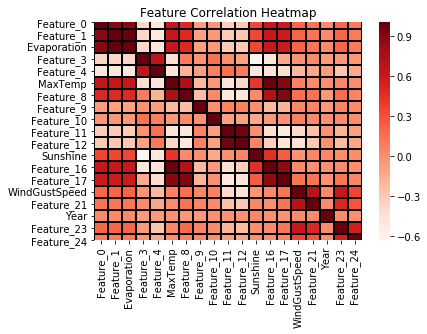

In [8]:
sns.heatmap(train_data.corr(), xticklabels=train_data.corr().columns, yticklabels=train_data.corr().columns, cmap='Reds', linewidth=1, linecolor='black')
plt.title('Feature Correlation Heatmap')
plt.show()

I have decided to visualize the strings features 5, 18 and 19 who, as we have seen earlier, all share similar values.
These bar graphs show that these 3 features have a very similar distribution, in addition to having similar values.

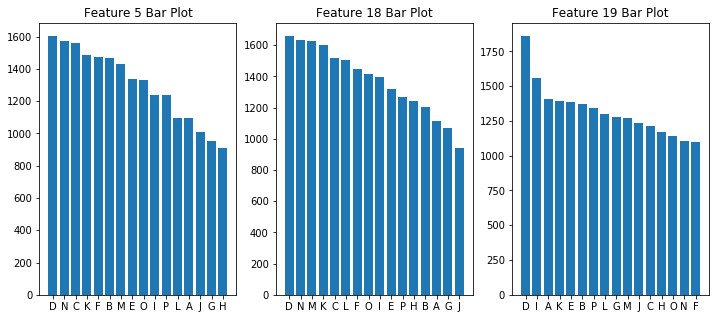

In [9]:
fig = plt.figure(figsize=(12,5))
f5 = fig.add_subplot(1, 3, 1)
f5.bar(train_data['Feature_5'].dropna().unique(),train_data['Feature_5'].dropna().value_counts())
f5.title.set_text("Feature 5 Bar Plot")
f18 = fig.add_subplot(1, 3, 2)
f18.bar(train_data['Feature_18'].dropna().unique(),train_data['Feature_18'].dropna().value_counts())
f18.title.set_text("Feature 18 Bar Plot")
f19 = fig.add_subplot(1, 3, 3)
f19.bar(train_data['Feature_19'].dropna().unique(),train_data['Feature_19'].dropna().value_counts())
f19.title.set_text("Feature 19 Bar Plot")
plt.show()



The histogram of the Max Temparature feature shows that this features has a similar distribution to the normal distribution with Expected value of 1.648 and standard deviation of 0.48.

Text(0.5, 1.0, 'Max Temperature Histogram $\\mu=$1.648, $\\sigma=0.480$')

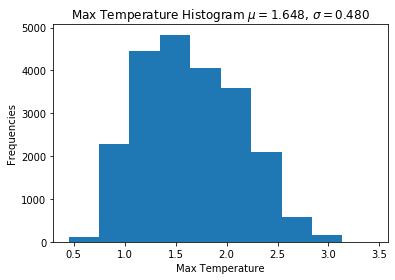

In [10]:
train_data["MaxTemp"].plot.hist()
plt.xlabel("Max Temperature")
plt.ylabel("Frequencies")
mean=train_data["MaxTemp"].mean()
std=train_data["MaxTemp"].std()
plt.title(r"Max Temperature Histogram $\mu=$%.3f, $\sigma=%.3f$" %(mean, std))

I suspected that the features Evaporation and Max Temperature may be correlated. According to the scatter plot and the calculation there is some positive linear correlation, but it is not highly significant.

Text(0.5, 1.0, 'Evaporation vs Max Temperature\n Correlation=0.624')

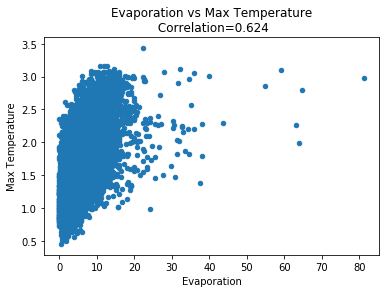

In [11]:
train_data.plot.scatter(x='Evaporation', y='MaxTemp', title='Revenue (millions) vs Rating');
plt.xlabel("Evaporation")
plt.ylabel("Max Temperature")
plt.title('Evaporation vs Max Temperature\n Correlation=%.3f'%train_data[["Evaporation", "MaxTemp"]].corr().values[0,1])

      

The boxplot of the Wind Gust feature by years shows that this features has a similar distribution in each year.

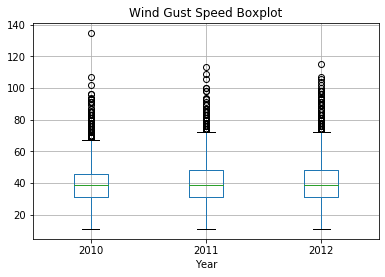

In [12]:
train_data.boxplot(column='WindGustSpeed',by='Year')
plt.title('Wind Gust Speed Boxplot')
plt.suptitle('')
plt.show()

## Ⅱ. Preprocessing

### A. Feature Engineering

The graph 'Evaporation vs. Max Temperature' have shown that there is some correlation between the evaporation and max temperature features. I have decided to use this and add another feature that is dependent on these 2 features. The new feature states whether or not it is a hot day.

In [13]:
def hot_day(max_temp, evaporation):
    condition_1 = max_temp>1.7
    condition_2 = evaporation>5
    return condition_1 * condition_2 * 1

train_data['HotDay']=hot_day(train_data['MaxTemp'], train_data['Evaporation'])
train_data['HotDay']=train_data['HotDay'].astype('int64')

C:\Users\gash5\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


### B. Outliers Removal

Presented are the boxplots of the numerical features. These boxplots clearly show that some features that have a significant amount of outliers.

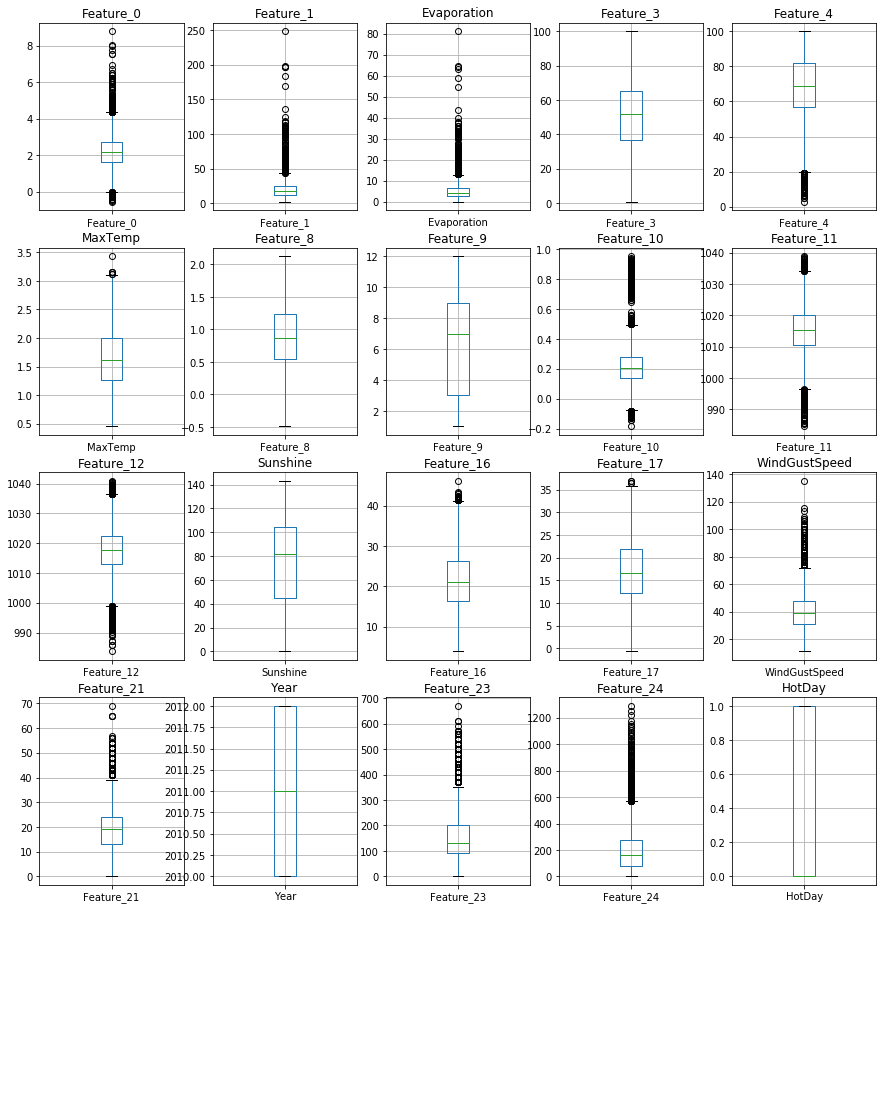

In [14]:
numeric_features=train_data.select_dtypes(include=['float64','int64'])
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 20))
counter = 0
for i in range(5):
    for j in range(5):

        ax = axes[i][j]

        if counter < len(numeric_features.columns):

            train_data.boxplot(numeric_features.columns[counter],ax=ax)
            plt.sca(axes[i, j])
            ax.set_title(numeric_features.columns[counter])
            ax.set_xlabel('')

        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()



I chose features that have shown a significant amount of outliers in their boxplot. From each of those features, I use the interquartile range to find the outlier observations. These observations are removed from the train data.

In [15]:
features_with_outliers=["Feature_0", "Feature_1", "Evaporation", "Feature_4", "Feature_10", "Feature_11",
                        "Feature_12", "Feature_16", "WindGustSpeed", "Feature_21", "Feature_23", "Feature_24" ]
for feature in features_with_outliers:
    Q1 = np.quantile(train_data[feature],0.25)
    Q3 = np.quantile(train_data[feature],0.75)
    IQR = Q3 - Q1
    outliers=(train_data[feature] < ( Q1-1.5*IQR)) | (train_data[feature] > ( Q3 + 1.5*IQR))
    outliers_data=[train_data.index[i] for i, x in enumerate(outliers) if x]
    outliers_labels=[train_labels.index[i] for i, x in enumerate(outliers) if x]
    train_data.drop(outliers_data, axis=0, inplace=True)
    train_labels.drop(outliers_labels, axis=0, inplace=True)

C:\Users\gash5\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


### C. Missing Values

As shown in the data exploration chapter, there are 16 features that have NULL values.

For the numeric features I chose to deal with those values by replacing them with either the mean or the median of the relevant feature.

By observing the distrubition plots of the numeric features I chose the features that seem to distribute close to normal distribution. For them, I chose the mean. For the rest of the numeric features, I chose the median.

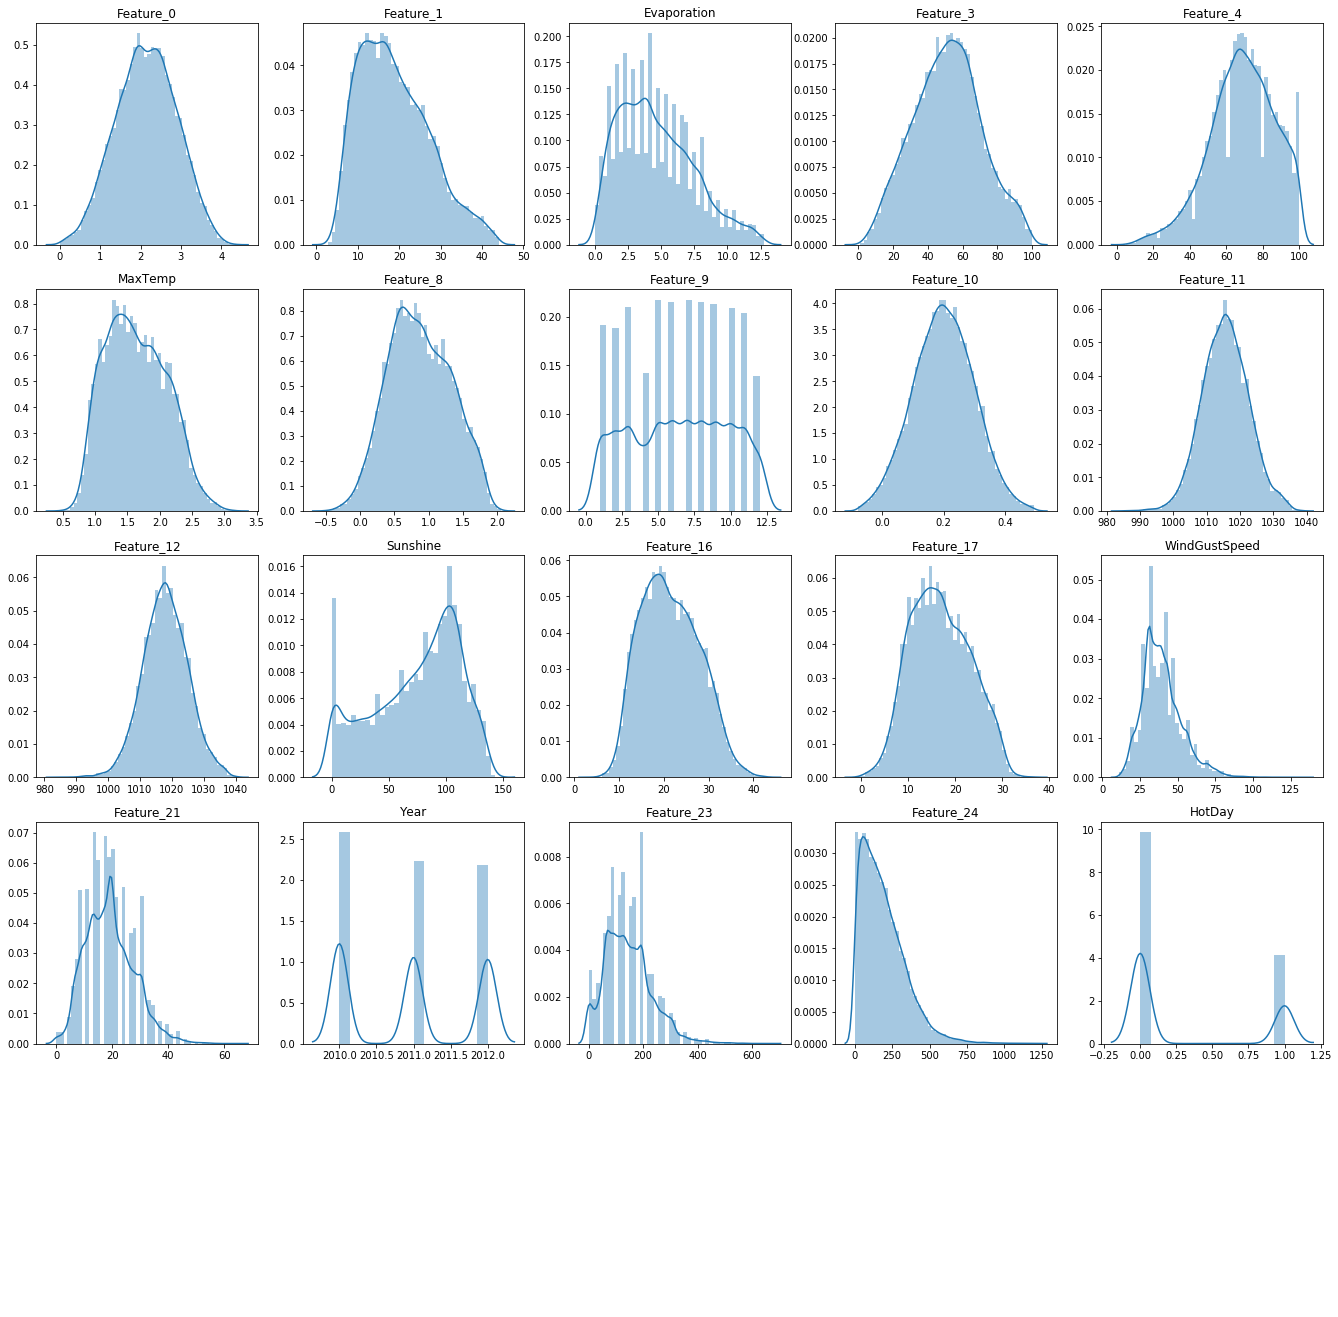

In [16]:
numeric_features=train_data.select_dtypes(include=['float64','int64'])
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(13, 13))
counter = 0
for i in range(5):
    for j in range(5):

        ax = axes[i][j]

        if counter < len(numeric_features.columns):

            sns.distplot(numeric_features[numeric_features.columns[counter]].dropna(), ax=ax)
            ax.set_title(numeric_features.columns[counter])
            ax.set_xlabel('')


        else:
            ax.set_axis_off()
        
        counter += 1

plt.subplots_adjust(right=1.5 ,top=1.5)
plt.show()


In [17]:
normal_features=["Feature_0", "Feature_3", "MaxTemp", "Feature_8", "Feature_10", "Feature_11",
                 "Feature_12", "Feature_16", "Feature_17"]
numeric_features=train_data.select_dtypes(include=['float64','int64'])
for feature in numeric_features.columns:
    if feature in normal_features:
        mean=train_data[feature].mean()
        train_data[feature].fillna(mean ,inplace=True)
    else:
        median=train_data[feature].median()
        train_data[feature].fillna(median,inplace=True)

For the categorical features I chose to replace the missing values with the feature's most common value instead of the missing values.

In [18]:
def MostCommonValue(values):
    counter = {}
    for value in values:
        if value in counter:
            counter[value] += 1
        else:
            counter[value] = 1
    return sorted(counter, key = counter.get, reverse = True)[0]

In [19]:
string_features=train_data.select_dtypes(include=['object'])
for feature in string_features.columns:
    most_common_value=MostCommonValue(train_data[feature])
    train_data[feature].fillna(most_common_value,inplace=True)

After this process, it can be seen that there are no missing values in any of the features.

In [20]:
train_data.isnull().sum()

Feature_0        0
Feature_1        0
Evaporation      0
Feature_3        0
Feature_4        0
Feature_5        0
Feature_6        0
MaxTemp          0
Feature_8        0
Feature_9        0
Feature_10       0
Feature_11       0
Feature_12       0
Feature_13       0
Feature_14       0
Sunshine         0
Feature_16       0
Feature_17       0
Feature_18       0
Feature_19       0
WindGustSpeed    0
Feature_21       0
Year             0
Feature_23       0
Feature_24       0
HotDay           0
dtype: int64

### D. Categorical Features

Features 5, 18, 19 were shows to have very similar values and very similar distributions. By using Cramer's V I checked their correlation. Despite what I assumed, their correlation was low. Therefore, I didn't remove any of them.

In [21]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [22]:
similar_features= ["Feature_5", "Feature_18", "Feature_19"]
dict = {0:1, 1:2, 2:1}

for key in dict:
    feature_1 = similar_features[key]
    feature_2 = similar_features[dict[key]]
    corr = cramers_v(train_data[feature_1], train_data[feature_2])
    print("The correlation beatween %s and %s is %f" %(feature_1, feature_2, corr))

The correlation beatween Feature_5 and Feature_18 is 0.342340
The correlation beatween Feature_18 and Feature_19 is 0.195782
The correlation beatween Feature_19 and Feature_18 is 0.195782


As shown in the data exploration chapter, feature 13 is a binary feature with an aditional 'unknown' value. the 'unknown' value is only 0.36% of feature's values. I decided to randomly replace it with either a 0 or a 1. by replacing '0' with 0 and '1' with 1 the feature was changed to a numeric feature.

In [23]:
percent = sum(train_data['Feature_13']=='unknown')*100/len(train_data['Feature_13'])
print("The unknown value in feature 13 is %f%% of the feature" %percent)

The unknown value in feature 13 is 0.351941% of the feature


In [24]:
unknown=train_data['Feature_13']=='unknown'
train_data.loc[unknown, 'Feature_13']= str(random.randint(0,1))
train_data['Feature_13'] = train_data['Feature_13'].astype('int64')

feature 14 was shown in the data exploration chapter to be a measurement. Therefore, I turned it into a numeric feature.

In [25]:
most_common_value = float(str(MostCommonValue(train_data['Feature_14'])).replace('mm',''))
dict={}
for value in train_data['Feature_14'].unique():
    dict[value]=float(str(value).replace('mm',''))

for key in dict:
    condition = train_data['Feature_14']==key
    train_data.loc[condition, 'Feature_14']=dict[key]
    
train_data['Feature_14'] = train_data['Feature_14'].astype('float64')
train_data['Feature_14'].fillna(most_common_value,inplace=True)

I transformed feature 6 into a numerical feature in a similar way.

In [26]:
most_common_value = float(str(MostCommonValue(train_data['Feature_6'])).replace('a',''))
dict={}
for value in train_data['Feature_6'].unique():
    dict[value]=float(str(value).replace('a',''))

for key in dict:
    condition = train_data['Feature_6']==key
    train_data.loc[condition, 'Feature_6']=dict[key]
    
train_data['Feature_6'] = train_data['Feature_6'].astype('int64')
train_data['Feature_6'].fillna(most_common_value,inplace=True)

### E. Data Scaling

The distribution plots of the numeric features show that many features seem to distribute close to the normal distribution. Dispite that, the features are not yet normalised. 

I chose to perform data scaling using standardization. I chose this method in order to be able to perform PCA in the next phase.

In [27]:
numeric_features=train_data.select_dtypes(include=['float64','int64'])
standard_scaler = StandardScaler()
standard_scaler.fit(numeric_features)
scaled_numeric_features = standard_scaler.transform(numeric_features)
scaled_numeric_features_df=pd.DataFrame(scaled_numeric_features,columns=numeric_features.columns, index=train_data.index)
scaled_numeric_features_df.fillna(0, inplace=True)

### F. Dummy Variables

There are 3 categorical features left. I represent them with dummy variables.

In [28]:
string_features=train_data.select_dtypes(include=['object'])
dummies=pd.get_dummies(string_features, drop_first=True)
dummies.fillna(0, inplace=True)
scaled_train_data=scaled_numeric_features_df.join(dummies)

The current train data looks like this:

In [29]:
scaled_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20458 entries, 0 to 22160
Data columns (total 68 columns):
Feature_0        20458 non-null float64
Feature_1        20458 non-null float64
Evaporation      20458 non-null float64
Feature_3        20458 non-null float64
Feature_4        20458 non-null float64
Feature_6        20458 non-null float64
MaxTemp          20458 non-null float64
Feature_8        20458 non-null float64
Feature_9        20458 non-null float64
Feature_10       20458 non-null float64
Feature_11       20458 non-null float64
Feature_12       20458 non-null float64
Feature_13       20458 non-null float64
Feature_14       20458 non-null float64
Sunshine         20458 non-null float64
Feature_16       20458 non-null float64
Feature_17       20458 non-null float64
WindGustSpeed    20458 non-null float64
Feature_21       20458 non-null float64
Year             20458 non-null float64
Feature_23       20458 non-null float64
Feature_24       20458 non-null float64
HotDay     

### G. Dimensionality Reduction

The current dataset includes 26 features. Before I ran the machine learning algorithms on the data I preformed dimensionality reduction in order to avoid overfitting. First i went over all the correlations beatween all the features. If a set of features was found to have a correlation above 0.95, the feature with the least variance was removed.

In [30]:
corr=scaled_train_data.corr()
corr_features={}
for col in range(len(corr.columns)):
    for ind in range(col+1,len(corr.columns)):
        if corr[corr.columns[col]][corr.columns[ind]]>0.95: 
            corr_features[corr.columns[col]]=corr.columns[ind]

            
for feature in corr_features.keys():
    if np.var(scaled_train_data[feature]) < np.var(scaled_train_data[corr_features[feature]]):
        scaled_train_data.drop(feature, axis=1, inplace=True)
    else:
        scaled_train_data.drop(corr_features[feature], axis=1, inplace=True)                                     

In [31]:
print('The number of features went down from %d to %d' %(len(scaled_numeric_features_df.columns) + len(dummies.columns), len(scaled_train_data.columns))) 

The number of features went down from 68 to 65


After that first step I preformed PCA. The number of components in the PCA was the lowest number that explained at least 90% of the data.

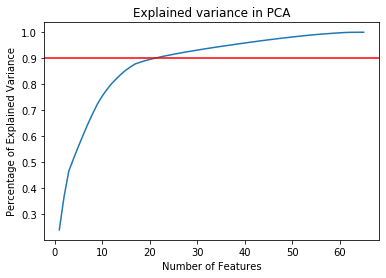

In [32]:
number_of_features=range(1, len(scaled_train_data.columns)+1)
explained_variance=[]
above_90=[]
for num in number_of_features:
    pca = PCA(n_components=num)
    pca.fit(scaled_train_data)
    pca_train_data = pca.transform(scaled_train_data)
    explained=pca.explained_variance_ratio_.sum()
    explained_variance.append(explained)
    if explained>0.9:
        above_90.append(num)
    
    
    
plt.plot(number_of_features,explained_variance)
plt.title('Explained variance in PCA')
plt.xlabel('Number of Features')
plt.ylabel('Percentage of Explained Variance')
plt.axhline(y=0.9, color='red')

In [33]:
print('The PCA is performed with %d features' %above_90[0])

The PCA is performed with 22 features


In [34]:
pca = PCA(n_components=above_90[0])
pca.fit(scaled_train_data)
pca_train_data_array = pca.transform(scaled_train_data)
pca_train_data=pd.DataFrame(pca_train_data_array, index=train_data.index)

### H. Preprocessing for the Test Set

Same preprocessing steps applied for the train data are also applied for the test data except for the outliers removal step.

In [35]:
test_data = pd.read_csv("test_without_target.csv")

In [36]:
test_data['HotDay']=hot_day(test_data['MaxTemp'], train_data['Evaporation'])
train_data['HotDay']=train_data['HotDay'].astype('int64')

In [37]:
normal_features=["Feature_0", "Feature_3", "MaxTemp", "Feature_8", "Feature_10", "Feature_11",
                 "Feature_12", "Feature_16", "Feature_17"]
numeric_features=test_data.select_dtypes(include=['float64','int64'])
for feature in numeric_features.columns:
    if feature in normal_features:
        mean=test_data[feature].mean()
        test_data[feature].fillna(mean ,inplace=True)
    else:
        median=test_data[feature].median()
        test_data[feature].fillna(median,inplace=True)

In [38]:
string_features=test_data.select_dtypes(include=['object'])
for feature in string_features.columns:
    most_common_value=MostCommonValue(test_data[feature])
    test_data[feature].fillna(most_common_value,inplace=True)

In [39]:
unknown=test_data['Feature_13']=='unknown'
test_data.loc[unknown, 'Feature_13']= str(random.randint(0,1))
test_data['Feature_13'] = test_data['Feature_13'].astype('int64')

In [40]:
most_common_value = float(str(MostCommonValue(test_data['Feature_14'])).replace('mm',''))
dict={}
for value in test_data['Feature_14'].unique():
    dict[value]=float(str(value).replace('mm',''))

for key in dict:
    condition = test_data['Feature_14']==key
    test_data.loc[condition, 'Feature_14']=dict[key]
    
test_data['Feature_14'] = test_data['Feature_14'].astype('float64')
test_data['Feature_14'].fillna(most_common_value ,inplace=True)

In [41]:
most_common_value = float(str(MostCommonValue(test_data['Feature_6'])).replace('a',''))
dict={}
for value in test_data['Feature_6'].unique():
    dict[value]=float(str(value).replace('a',''))

for key in dict:
    condition = test_data['Feature_6']==key
    test_data.loc[condition, 'Feature_6']=dict[key]
    
test_data['Feature_6'] = train_data['Feature_6'].astype('int64')
test_data['Feature_6'].fillna(most_common_value ,inplace=True)

In [42]:
string_features=test_data.select_dtypes(include=['object'])
for feature in string_features:
    l_encoder=LabelEncoder()
    l_encoder.fit(test_data[feature].unique())
    test_data[feature]=l_encoder.transform(test_data[feature])  
    test_data[feature]=test_data[feature].astype('int64')

In [43]:
standard_scaler = StandardScaler()
standard_scaler.fit(test_data)
scaled_test_data_array = standard_scaler.transform(test_data)
scaled_test_data=pd.DataFrame(scaled_test_data_array,columns=test_data.columns, index=test_data.index)

In [44]:
corr=scaled_test_data.corr()
corr_features={}
for col in range(len(corr.columns)):
    for ind in range(col+1,len(corr.columns)):
        if corr[corr.columns[col]][corr.columns[ind]]>0.95: 
            corr_features[corr.columns[col]]=corr.columns[ind]

            
for feature in corr_features.keys():
    scaled_test_data.drop(feature, axis=1, inplace=True)

In [45]:
pca = PCA(n_components=above_90[0])
pca.fit(scaled_test_data)
pca_test_data_array = pca.transform(scaled_test_data)
pca_test_data = pd.DataFrame(pca_test_data_array, index=test_data.index)

## Ⅲ. Models

In this chapter I wrote 3 functions in order to evaluate and select the best machine learning model:

The function KFCV_draw_roc runs k-fold cross-validation and uses the function draw_roc in order to draw the ROC curve for each of the k folds and their mean. The function returns the mean AUC for all the folds. the ROC curve and the AUC are calculated from the validation set. KFCV_draw_roc is used the examine and visualize the accuracy of the model.

the function get_auc returns the accuracies (measured by the AUC metric) of both the train and validation set of the model. get_auc is used to select the model's hyper paramaters by checking the model's validation accuracy. get_auc is also user for checking for overfitting by comparring the model's train accuracy and validation accuracy.

In [46]:
def KFCV_draw_roc(X, y, clf, k, model):
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
    global interps
    aucs, interps = [], []
    xs=np.linspace(0, 1, 100)
    for train_index, validation_index in kf.split(X):
        clf.fit(X.iloc[train_index], y.iloc[train_index])
        aucs.append(draw_roc(X, y, clf, validation_index))
    plt.plot([0, 1], [0, 1] ,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    mean_interps = np.mean(interps, axis=0)
    mean_auc=np.mean(aucs)
    plt.plot(xs, mean_interps, label='mean ROC (area=%.3f)' %mean_auc, color='red')
    plt.title('%s\n K-Fold Cross-Validation\nROC Curve' %model)
    plt.plot([0], [0], color='grey', linestyle='-', label='K-folds') 
    plt.legend(loc="lower right")
    plt.show()
    return mean_auc

def draw_roc(X, y, clf, index):
    xs=np.linspace(0, 1, 100)
    y_prob=clf.predict_proba(X.iloc[index])
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_prob[:,1])
    interps.append(np.interp(xs, fpr, tpr))
    plt.plot(fpr, tpr, color='grey')
    return auc(fpr, tpr)

def get_auc(X, y, clf):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)
    clf.fit(X_train, y_train)
    y_prob_train = clf.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, threshold_train= roc_curve(y_train, y_prob_train)
    auc_train=auc(fpr_train, tpr_train)
    y_prob_validation = clf.predict_proba(X_validation)[:, 1]
    fpr_validation, tpr_validation, threshold_validation = roc_curve(y_validation, y_prob_validation)
    auc_validation=auc(fpr_validation, tpr_validation)
    return auc_train, auc_validation


### A. k-Nearest Neighbors

k-NN's hyperparameter is K: the number of neighbors. K is selected by the value that gets the highest validation accuracy.

In low values of K the model is slightly overfitted. This can be seen from the diffrences between the train and validation accuracies. Once the value of K rises above 50 the train and validation accuracies align and from that point the model is not overfitted.

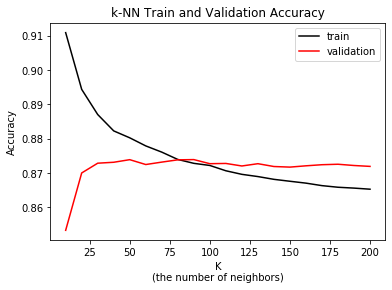

In [47]:
number_of_neighbors=range(10, 201, 10)
train, validation = [], []
for number in number_of_neighbors:
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=number, weights="uniform", metric="euclidean", algorithm= "brute")
    train_auc, validation_auc = get_auc(pca_train_data, train_labels['label'], knn_clf)
    train.append(train_auc)
    validation.append(validation_auc)
plt.plot(number_of_neighbors, train, label='train', color='black')
plt.plot(number_of_neighbors, validation, label='validation', color='red')
plt.xlabel('K\n(the number of neighbors)')
plt.ylabel('Accuracy')
plt.title('k-NN Train and Validation Accuracy')
plt.legend()
plt.show()

In [48]:
best_neighbor = number_of_neighbors[np.argmax(validation)]
best_score=max(validation)*100
print('The number of neighbors to get the highest accuracy in k-NN is %d with accuracy of %f%%' %(best_neighbor,best_score))

The number of neighbors to get the highest accuracy in k-NN is 90 with accuracy of 87.392609%


### B. Logistic Regression

Logistic regression's hyperparamater is C: the inverse of the regularization parameter. C is selected by the value that gets the highest validation accuracy.
In very low values of C (stronger relularization) the model is completely useless and gets accuracy of 0.5. In the rest of the values the model gives good results.

There seems to be no diffrence between the train and validation accuracies, meaning the model is not overfitted.

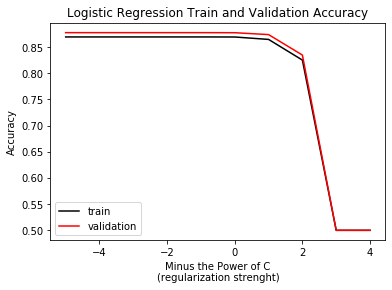

In [49]:
powers = range(-5,5)
minus_powers=range(4,-6,-1)
Cs = [10**p for p in powers]
train, validation = [], []
for c in Cs:
    log_clf=LogisticRegression(penalty='l1', solver='liblinear', C=c)
    train_auc, validation_auc = get_auc(pca_train_data, train_labels['label'], log_clf)
    train.append(train_auc)
    validation.append(validation_auc)
plt.plot(minus_powers, train, label='train', color='black')
plt.plot(minus_powers, validation, label='validation', color='red')
plt.xlabel('Minus the Power of C\n(regularization strenght)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Train and Validation Accuracy')
plt.legend()
plt.show()

In [50]:
best_c=Cs[np.argmax(validation)]
best_score=max(validation)*100
print('The C to get the highest accuracy in logistic regression is %d with accuracy of %f%%' %(best_c,best_score))

The C to get the highest accuracy in logistic regression is 1 with accuracy of 87.770833%


### C. Random Forest

Random forest's hyperparamater is the number of trees. It is selected by the value that gets the highest validation accuracy.
It can be seen from the results that this hyperparameter doesn't effect the train and validation accuracies at any step.

There seems to be no significant diffrence between the train and validation accuracies, meaning the model is not overfitted.

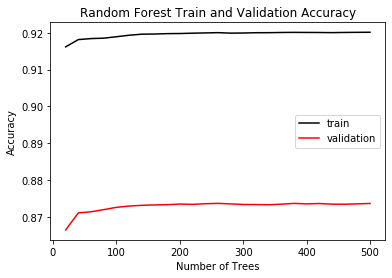

In [51]:
number_of_trees = range(20,501,20)
train, validation = [], []
for number in number_of_trees:
    forest_clf=RandomForestClassifier(n_estimators=number, criterion = 'gini', min_samples_leaf= 10, min_samples_split= 100, random_state=0)
    train_auc, validation_auc = get_auc(pca_train_data, train_labels['label'], forest_clf)
    train.append(train_auc)
    validation.append(validation_auc)
plt.plot(number_of_trees, train, label='train', color='black')
plt.plot(number_of_trees, validation, label='validation', color='red')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Train and Validation Accuracy')
plt.legend()
plt.show()

In [52]:
best_number_of_trees=number_of_trees[np.argmax(validation)]
best_score=max(validation)*100
print('The number of trees to get the highest accuracy in random forest is %d with accuracy of %f%%' %(best_number_of_trees,best_score))

The number of trees to get the highest accuracy in random forest is 260 with accuracy of 87.362397%


### D. Multi-Layer Perceptron

Some of the MLP's hyperparamaters are selected using the GridSearchCV function that performs exhaustive search to find the best values.

In [53]:
parametersOptions = {'activation' : ['relu'],
                     'solver' : ['sgd'],
                      'hidden_layer_sizes' : [(100,), (50, 50), (20, 20, 20)],
                      'learning_rate_init' : [0.1, 0.01, 0.001, 0.0001],
                       'max_iter' : [1500],
                        'shuffle' : [True],
                        'random_state' : [0]
                       }
                     
GS = GridSearchCV(MLPClassifier(), parametersOptions, cv=3, scoring='roc_auc')
GS.fit(pca_train_data, train_labels['label'])

C:\Users\gash5\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(100,), (50, 50), (20, 20, 20)],
                   

In [54]:
print (' The best hyperparameters chosen after exhaustive search are {}'.format(GS.best_params_))
print ("The accuracy of the chosen hyperparameters is: ", GS.best_score_)

 The best hyperparameters chosen after exhaustive search are {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 1500, 'random_state': 0, 'shuffle': True, 'solver': 'sgd'}
The accuracy of the chosen hyperparameters is:  0.8755541117285721


The hyperparamater alpha is the L2 regularization parameter. Alpha is selected by the value that gets the highest validation accuracy.
In very high values of alpha (stronger relularization) the model's preformance goes down.

It can be seen from the results that there is no significant diffrence between the train and validation accuracies, meaning the model is not overfitted.

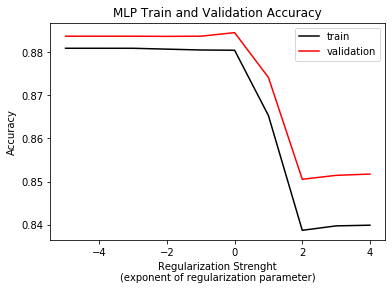

In [55]:
powers = range(-5,5)
alphas = [10**p for p in powers]
train, validation = [], []
for alp in alphas:
    mlp_clf=MLPClassifier(**GS.best_params_, alpha=alp)
    train_auc, validation_auc = get_auc(pca_train_data, train_labels['label'], mlp_clf)
    train.append(train_auc)
    validation.append(validation_auc)
plt.plot(powers, train, label='train', color='black')
plt.plot(powers, validation, label='validation', color='red')
plt.xlabel('Regularization Strenght\n(exponent of regularization parameter)')
plt.ylabel('Accuracy')
plt.title('MLP Train and Validation Accuracy')
plt.legend()
plt.show()

In [56]:
best_alpha=alphas[np.argmax(validation)]
best_score=max(validation)*100
print('The alpha to get the best accuracy in MLP is %d with accuracy of %f' %(best_alpha,best_score))

The alpha to get the best accuracy in MLP is 1 with accuracy of 88.451012


## Ⅳ. Model Selection and Results

I performed k-fold cross validation (with k=10) for every model and plotted their ROC curve.
The models' accuracies were meassured using the mean validation AUC in k-fold cross-validation.

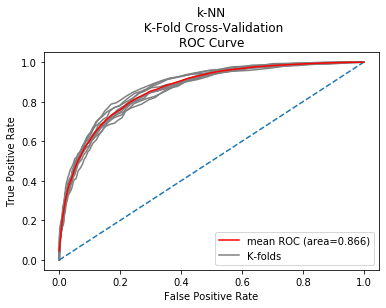

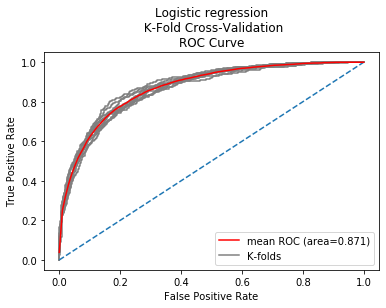

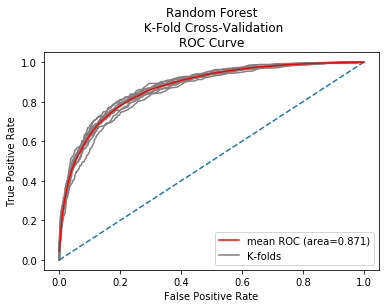

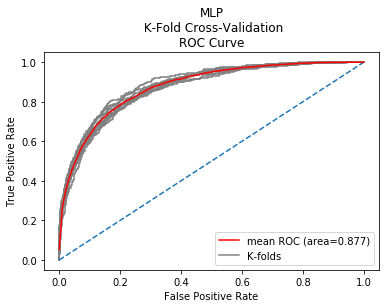

In [57]:
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=best_neighbor, weights="uniform", metric="euclidean", algorithm= "brute")
knn_auc = KFCV_draw_roc(pca_train_data, train_labels['label'], knn_clf, 10, 'k-NN')

log_clf = LogisticRegression(penalty='l1', solver='liblinear', C=best_c)
log_auc = KFCV_draw_roc(pca_train_data, train_labels['label'], log_clf, 10, 'Logistic regression')

forest_clf = RandomForestClassifier(n_estimators=best_number_of_trees)
forest_auc = KFCV_draw_roc(pca_train_data, train_labels['label'], forest_clf, 10, 'Random Forest')

mlp_clf = MLPClassifier(**GS.best_params_, alpha=best_alpha)
mlp_auc = KFCV_draw_roc(pca_train_data, train_labels['label'], mlp_clf, 10, 'MLP')

In [58]:
models=['k-NN', 'Logistic Regression', 'Random Forest', 'MLP']
aucs=[knn_auc, log_auc, forest_auc, mlp_auc]
best_model = models[np.argmax(aucs)]
best_auc = max(aucs)*100
print('The model to get the Highest accuracy is %s.\n The model received accuracy of %f.\n' %(best_model, best_auc))

The model to get the Highest accuracy is MLP.
 The model received accuracy of 87.676173.



I plotted MLP's confusion matrix.

In [59]:
mlp_clf=MLPClassifier(**GS.best_params_, alpha=best_alpha)
X_train, X_validation, y_train, y_validation = train_test_split(pca_train_data, train_labels['label'], test_size=0.25, random_state=0, shuffle=True)
mlp_clf.fit(X_train, y_train)
validation_preds = mlp_clf.predict(X_validation)

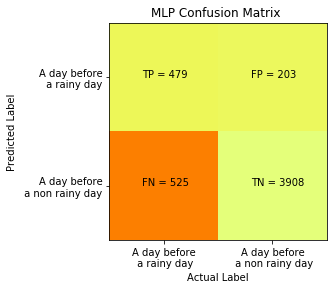

In [60]:
mlp_confusion_matrix = confusion_matrix(y_validation, validation_preds)
plt.imshow(mlp_confusion_matrix,cmap=plt.cm.Wistia)
plt.title('MLP Confusion Matrix ')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.xticks([0.25,0.75], ['A day before\n a rainy day', 'A day before\n a non rainy day'])
plt.yticks([0.25,0.75],['A day before\n a non rainy day', 'A day before\n a rainy day'])
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(0.65,0.25, 'TN = '+str(mlp_confusion_matrix[0][0]))
plt.text(0.15,0.25, 'FN = '+str(mlp_confusion_matrix[1][0]))
plt.text(0.65,0.75, 'FP = '+str(mlp_confusion_matrix[0][1]))
plt.text(0.15,0.75, 'TP = '+str(mlp_confusion_matrix[1][1]))
plt.show()


The MLP model was trained again using the train whole data (without splitting it into train and validation sets like before). The prediction results were produced to an excel document.

In [61]:
mlp_clf_all_data=MLPClassifier(**GS.best_params_, alpha=best_alpha)
mlp_clf_all_data.fit(pca_train_data, train_labels['label'])

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [62]:
test_predictions = mlp_clf_all_data.predict_proba(pca_test_data)[:, 1]
test_predictions_df=pd.DataFrame(test_predictions, columns=['pred_proba'], index=range(0,len(pca_test_data)))
test_predictions_df.to_csv(r'Submission_group_number.csv', index = True)